In [2]:
import torch
print(torch.__version__)
print("CUDA Available:", torch.cuda.is_available())
print("Device:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU")


2.7.1+cu118
CUDA Available: True
Device: NVIDIA GeForce RTX 4060 Laptop GPU


In [3]:
import pandas as pd
import os


In [4]:
# CSV file 
csv_path = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\cleaned_labels.csv"

df = pd.read_csv(csv_path)

print("Loaded CSV with rows:", len(df))
df.head()


Loaded CSV with rows: 84


,filename,label
0,IMG_20220411_106246.jpg,1
1,IMG_20220411_106256.jpg,0
2,IMG_20220411_106258.jpg,0
3,IMG_20220411_09235385.jpg,0
4,IMG_20220411_09235389.jpg,0


In [5]:

image_dir = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\dataset\content\dataset"


df['exists'] = df['filename'].apply(lambda x: os.path.exists(os.path.join(image_dir, x)))


print("Matched image files:", df['exists'].sum(), "/", len(df))


df = df[df['exists']].copy()
df = df[['filename', 'label']]
df.head()


Matched image files: 84 / 84


,filename,label
0,IMG_20220411_106246.jpg,1
1,IMG_20220411_106256.jpg,0
2,IMG_20220411_106258.jpg,0
3,IMG_20220411_09235385.jpg,0
4,IMG_20220411_09235389.jpg,0


In [6]:
final_csv_path = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\final_verified_labels.csv"
df.to_csv(final_csv_path, index=False)
print("Final verified labels saved at:", final_csv_path)


Final verified labels saved at: C:\Users\ajith\OneDrive\Desktop\Dissertation\final_verified_labels.csv


In [7]:
print(f" TASK 1 COMPLETE: {len(df)} image-label pairs are verified and ready.")
df.sample(5)


 TASK 1 COMPLETE: 84 image-label pairs are verified and ready.


,filename,label
81,IMG_20220629_09248801.jpg,0
10,IMG_20220413_09235637.jpg,0
65,IMG_20220610_09245314.jpg,0
27,IMG_20220421_09236603.jpg,1
14,IMG_20220414_09235802.jpg,0


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [9]:
import pandas as pd

csv_path = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\final_verified_labels.csv"
image_dir = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\dataset\content\dataset"

df = pd.read_csv(csv_path)

print(f"Total samples: {len(df)}")
df.head()


Total samples: 84


,filename,label
0,IMG_20220411_106246.jpg,1
1,IMG_20220411_106256.jpg,0
2,IMG_20220411_106258.jpg,0
3,IMG_20220411_09235385.jpg,0
4,IMG_20220411_09235389.jpg,0


In [10]:
import pandas as pd

csv_path = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\cleaned_labels.csv"
df = pd.read_csv(csv_path)

print(df.head())                    # View top rows
print(df['label'].unique())         # Check unique label values
print(df['label'].value_counts())   # Count how many of each class


                    filename label
0    IMG_20220411_106246.jpg     1
1    IMG_20220411_106256.jpg     0
2    IMG_20220411_106258.jpg     0
3  IMG_20220411_09235385.jpg     0
4  IMG_20220411_09235389.jpg     0
['1' '0' 'result not found']
label
0                   66
1                   16
result not found     2
Name: count, dtype: int64


In [11]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, save_img

# Input paths
csv_path = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\cleaned_labels.csv"
image_dir = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\dataset\content\dataset"
output_dir = os.path.join(image_dir, "augmented")
os.makedirs(output_dir, exist_ok=True)

# Load CSV and keep only COVID-positive rows
df = pd.read_csv(csv_path)
df = df[df['label'].isin(['0', '1'])]     # Remove bad rows like 'result not found'
positive_df = df[df['label'] == '1']      # Correct way to select COVID-positive rows

print(f" Found {len(positive_df)} COVID-positive images to augment.")

# Image augmentor
augmentor = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Settings
AUG_PER_IMAGE = 5
augmented_entries = []

# Process positive images only
for _, row in positive_df.iterrows():
    img_path = os.path.join(image_dir, row['filename'])
    base_name = os.path.splitext(os.path.basename(row['filename']))[0]

    if not os.path.exists(img_path):
        print(f" File not found: {img_path}")
        continue

    try:
        img = load_img(img_path)
        x = img_to_array(img).reshape((1,) + img.size + (3,))  # Ensure shape is (1, height, width, 3)

        for i, batch in enumerate(augmentor.flow(x, batch_size=1)):
            aug_filename = f"{base_name}_aug_{i}.jpg"
            aug_path = os.path.join(output_dir, aug_filename)
            save_img(aug_path, batch[0])

            # Store label 1 for each augmented file
            augmented_entries.append({'filename': os.path.join('augmented', aug_filename), 'label': 1})
            print(f"Saved augmented image: {aug_filename}")

            if i + 1 >= AUG_PER_IMAGE:
                break

    except Exception as e:
        print(f" Error processing {img_path}: {e}")

# Save new CSV with only augmented entries
augmented_df = pd.DataFrame(augmented_entries)
output_csv = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\cleaned_labels_augmented.csv"
augmented_df.to_csv(output_csv, index=False)
print(f" Saved new CSV with only augmented positives: {output_csv}")


 Found 16 COVID-positive images to augment.
Saved augmented image: IMG_20220411_106246_aug_0.jpg
Saved augmented image: IMG_20220411_106246_aug_1.jpg
Saved augmented image: IMG_20220411_106246_aug_2.jpg
Saved augmented image: IMG_20220411_106246_aug_3.jpg
Saved augmented image: IMG_20220411_106246_aug_4.jpg
Saved augmented image: IMG_20220413_09235579_aug_0.jpg
Saved augmented image: IMG_20220413_09235579_aug_1.jpg
Saved augmented image: IMG_20220413_09235579_aug_2.jpg
Saved augmented image: IMG_20220413_09235579_aug_3.jpg
Saved augmented image: IMG_20220413_09235579_aug_4.jpg
Saved augmented image: IMG_20220413_09235624_aug_0.jpg
Saved augmented image: IMG_20220413_09235624_aug_1.jpg
Saved augmented image: IMG_20220413_09235624_aug_2.jpg
Saved augmented image: IMG_20220413_09235624_aug_3.jpg
Saved augmented image: IMG_20220413_09235624_aug_4.jpg
Saved augmented image: IMG_20220413_09235641_aug_0.jpg
Saved augmented image: IMG_20220413_09235641_aug_1.jpg
Saved augmented image: IMG_2022

In [12]:
import pandas as pd

# Load original and augmented CSVs
original_df = pd.read_csv("C:/Users/ajith/OneDrive/Desktop/Dissertation/cleaned_labels.csv")
augmented_df = pd.read_csv("C:/Users/ajith/OneDrive/Desktop/Dissertation/cleaned_labels_augmented.csv")

# Merge both dataframes
merged_df = pd.concat([original_df, augmented_df], ignore_index=True)

# Convert labels to string for safe filtering
merged_df['label'] = merged_df['label'].astype(str)

# Keep only valid labels '0' and '1'
merged_df = merged_df[merged_df['label'].isin(['0', '1'])]

# Convert back to integers
merged_df['label'] = merged_df['label'].astype(int)

# Shuffle the merged dataframe
merged_df = merged_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save to disk
merged_df.to_csv("C:/Users/ajith/OneDrive/Desktop/Dissertation/merged_labels.csv", index=False)

# Print final label distribution
print("Final label distribution:")
print(merged_df['label'].value_counts())


Final label distribution:
label
1    96
0    66
Name: count, dtype: int64


ConvNext-T Implementation

In [13]:
### 📦 Phase 1: Data Preparation and Augmentation Setup

import pandas as pd
import os
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the cleaned merged CSV
csv_path = r"C:/Users/ajith/OneDrive/Desktop/Dissertation/merged_labels.csv"
df = pd.read_csv(csv_path)

# Confirm label balance
print("Label distribution:")
print(df['label'].value_counts())

# Define base directory for images
image_dir = r"C:/Users/ajith/OneDrive/Desktop/Dissertation/dataset/content/dataset"

# Add full path to filenames for Keras generator
df['filepath'] = df['filename'].apply(lambda x: os.path.join(image_dir, x.replace('\\', '/')))



Label distribution:
label
1    96
0    66
Name: count, dtype: int64


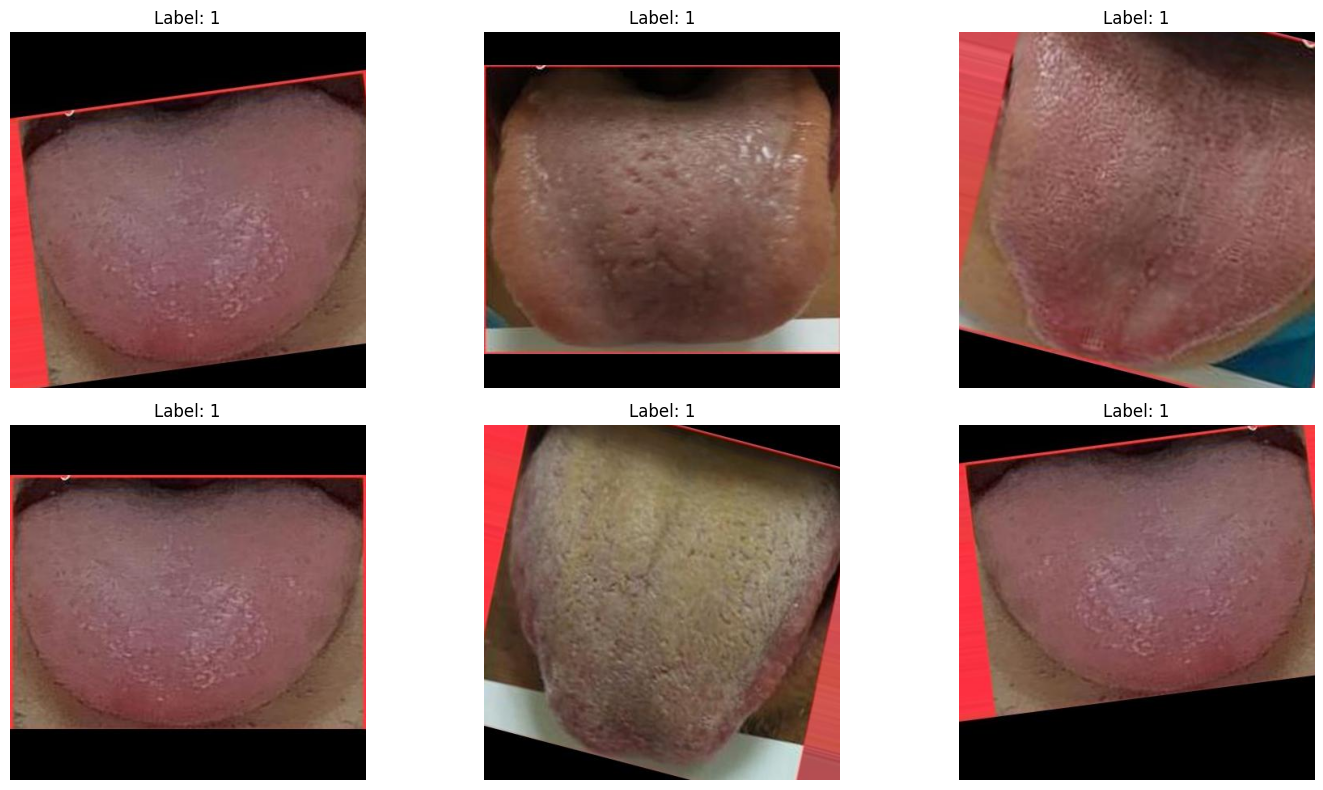

In [14]:
# Show a few sample images with their labels
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

sample_df = df.sample(6, random_state=42).reset_index(drop=True)

plt.figure(figsize=(15, 8))
for i in range(len(sample_df)):
    img = mpimg.imread(sample_df['filepath'][i])
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Label: {sample_df['label'][i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [15]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, matthews_corrcoef
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ConvNeXtTiny
from keras.applications.convnext import preprocess_input
from keras.callbacks import EarlyStopping, ModelCheckpoint


In [16]:

csv_path = r'C:/Users/ajith/OneDrive/Desktop/Dissertation/merged_labels.csv'
df = pd.read_csv(csv_path)

image_dir = r'C:/Users/ajith/OneDrive/Desktop/Dissertation/dataset/content/dataset'
df['full_path'] = df['filename'].apply(lambda x: os.path.join(image_dir, x.replace('\\', '/')))
df['label'] = df['label'].astype(str)

train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)
print("Train:", train_df['label'].value_counts().to_dict())
print("Val:", val_df['label'].value_counts().to_dict())


Train: {'1': 76, '0': 53}
Val: {'1': 20, '0': 13}


In [17]:

img_size = (224, 224)
batch_size = 16


train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_gen = train_datagen.flow_from_dataframe(
    train_df, x_col='full_path', y_col='label',
    target_size=img_size, batch_size=batch_size,
    class_mode='binary'
)
val_gen = val_datagen.flow_from_dataframe(
    val_df, x_col='full_path', y_col='label',
    target_size=img_size, batch_size=batch_size,
    class_mode='binary', shuffle=False
)


Found 129 validated image filenames belonging to 2 classes.
Found 33 validated image filenames belonging to 2 classes.


In [18]:

base_model = ConvNeXtTiny(include_top=False, input_shape=img_size + (3,), weights='imagenet')
base_model.trainable = True  # Fine-tune all layers

model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convnext_tiny (Functional)  (None, 7, 7, 768)         27820128  
                                                                 
 global_average_pooling2d (  (None, 768)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 768)               0         
                                                                 
 dense (Dense)               (None, 1)                 769       
                                                                 
Total params: 27820897 (106.13 MB)
Trainable params: 27820897 (106.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:

class MCCCallback(keras.callbacks.Callback):
    def __init__(self, val_gen, y_true):
        super().__init__()
        self.val_gen = val_gen
        self.y_true = y_true
        self.mcc_scores = []

    def on_epoch_end(self, epoch, logs=None):
        y_pred = (self.model.predict(self.val_gen) > 0.5).astype(int)
        mcc = matthews_corrcoef(self.y_true, y_pred)
        self.mcc_scores.append(mcc)
        print(f"Epoch {epoch + 1} MCC: {mcc:.4f}")


In [ ]:

y_train = train_df['label'].astype(int)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = {i : class_weights[i] for i in range(len(class_weights))}
print("Class Weights:", class_weights)

y_val_true = val_df['label'].astype(int).values
mcc_callback = MCCCallback(val_gen, y_val_true)

callbacks = [
    EarlyStopping(patience=6, restore_best_weights=True),
    ModelCheckpoint('convnext-t models/best_model_finetuned.keras', save_best_only=True),
    mcc_callback
]

history = model.fit(train_gen, validation_data=val_gen, epochs=30,
                    class_weight=class_weights, callbacks=callbacks)


Class Weights: {0: 1.2169811320754718, 1: 0.8486842105263158}
Epoch 1/30


1/9 [==>...........................] - ETA: 8:56 - loss: 0.6670 - accuracy: 0.5000

3/3 [==============================] - 8s 2s/step


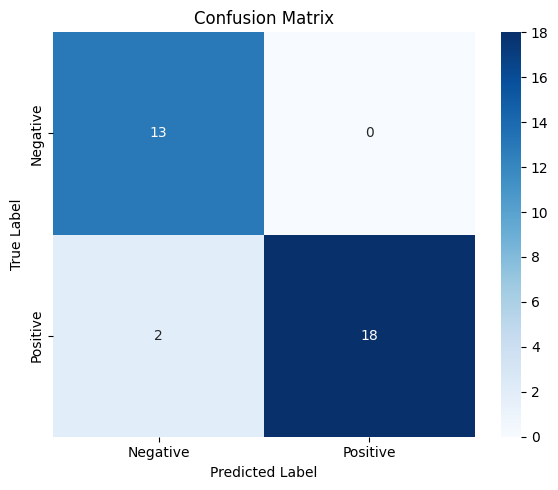

Accuracy: 0.9394
Precision: 1.0000
Recall (Sensitivity): 0.9000
Specificity: 1.0000
F1 Score: 0.9474
MCC: 0.8832
ROC AUC: 0.9885

Classification Report:
               precision    recall  f1-score   support

           0     0.8667    1.0000    0.9286        13
           1     1.0000    0.9000    0.9474        20

    accuracy                         0.9394        33
   macro avg     0.9333    0.9500    0.9380        33
weighted avg     0.9475    0.9394    0.9400        33



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score,
    matthews_corrcoef, precision_score, recall_score,
    f1_score, accuracy_score
)

# Predict on validation generator
val_gen.reset()
y_pred_probs = model.predict(val_gen).ravel()
y_pred = (y_pred_probs > 0.5).astype(int)

# Get true labels directly from generator
y_true = val_gen.classes

# Align lengths if needed
min_len = min(len(y_true), len(y_pred))
y_true = y_true[:min_len]
y_pred = y_pred[:min_len]
y_pred_probs = y_pred_probs[:min_len]

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Metrics
tn, fp, fn, tp = cm.ravel()
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)  # Sensitivity
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
f1 = f1_score(y_true, y_pred)
mcc = matthews_corrcoef(y_true, y_pred)
auc = roc_auc_score(y_true, y_pred_probs)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"MCC: {mcc:.4f}")
print(f"ROC AUC: {auc:.4f}")
print("\nClassification Report:\n", classification_report(y_true, y_pred, digits=4))


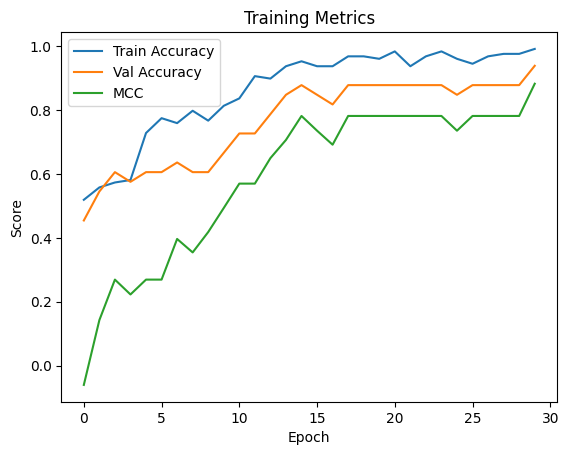

In [ ]:

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(mcc_callback.mcc_scores, label='MCC')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title("Training Metrics")
plt.legend()
plt.show()


In [ ]:

model.save('convnext-t models/final_model_finetuned.keras')
print("Final model saved to convnext-t models/")


Final model saved to convnext-t models/


## Markdown


In [ ]:
# Block 1: Setup and Data Preparation for ConvNeXt-T

import os
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, matthews_corrcoef
)
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ConvNeXtTiny
from tensorflow.keras.applications.convnext import preprocess_input

# Fix seeds
tf.random.set_seed(42)
np.random.seed(42)

# Constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 16
EPOCHS = 20
N_SPLITS = 10

# Load dataset
df = pd.read_csv(r"C:\Users\ajith\OneDrive\Desktop\Dissertation\merged_labels.csv")
image_dir = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\dataset\content\dataset"

# Verify files exist
df = df[df['filename'].apply(lambda x: os.path.exists(os.path.join(image_dir, x)))]

# Label to string
df['label'] = df['label'].astype(str)

# Class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(df['label']), y=df['label'])
class_weights_dict = dict(enumerate(class_weights))
print("Class weights:", class_weights_dict)


Class weights: {0: 1.2272727272727273, 1: 0.84375}


In [ ]:
# Block 2: Stratified K-Fold Setup + ConvNeXt-T Model Definition

from tensorflow.keras.models import Model

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)

# Image preprocessing
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# ConvNeXt-T model builder
def build_convnext_t_model():
    base_model = ConvNeXtTiny(
        include_top=False,
        input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3),
        weights="imagenet"
    )
    base_model.trainable = False  # Transfer learning setup

    inputs = tf.keras.Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.0005),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model


In [ ]:

N_REPEATS = 10
all_repeat_metrics = []

for repeat in range(N_REPEATS):
    print(f"Repeat {repeat + 1}/10")
    skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=repeat)

# Block 3: Training Loop, Evaluation, and Model Saving

fold_metrics = []
fold_results = {}

for fold, (train_idx, val_idx) in enumerate(skf.split(df['filename'], df['label'])):
    print(f"\n=== Fold {fold + 1}/{N_SPLITS} ===")

    # Split data for the current fold
    train_df = df.iloc[train_idx]
    val_df = df.iloc[val_idx]

    # Create training and validation generators
    train_gen = datagen.flow_from_dataframe(
        dataframe=train_df,
        directory=image_dir,
        x_col='filename',
        y_col='label',
        target_size=IMG_SIZE,
        class_mode='binary',
        batch_size=BATCH_SIZE,
        shuffle=True
    )

    val_gen = datagen.flow_from_dataframe(
        dataframe=val_df,
        directory=image_dir,
        x_col='filename',
        y_col='label',
        target_size=IMG_SIZE,
        class_mode='binary',
        batch_size=BATCH_SIZE,
        shuffle=False
    )

    # Build and train model
    model = build_convnext_t_model()

    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=EPOCHS,
        class_weight=class_weights_dict,
        callbacks=[
            callbacks.EarlyStopping(patience=5, restore_best_weights=True)
        ],
        verbose=1
    )

    # Evaluate model
    val_gen.reset()
    y_true = val_df['label'].astype(int).values
    y_pred_probs = model.predict(val_gen).ravel()
    y_pred = (y_pred_probs > 0.5).astype(int)

    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, confusion_matrix

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)

    metrics = {
        'fold': fold + 1,
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'specificity': specificity,
        'f1': f1_score(y_true, y_pred),
        'auc': roc_auc_score(y_true, y_pred_probs),
        'mcc': matthews_corrcoef(y_true, y_pred)
    }

    fold_metrics.append(metrics)
    fold_results[fold + 1] = {'y_true': y_true, 'y_pred_probs': y_pred_probs}

    print(f"Fold {fold + 1} metrics:", metrics)

    # Save model
    import os
    os.makedirs("convnext_models", exist_ok=True)
    model.save(f"convnext_models/convnext_t_fold{fold + 1}.h5")

   
  # Indent original loop inside the repeat loop

    # After each repeat, save the fold_metrics of that repeat
    all_repeat_metrics.extend(fold_metrics)


Repeat 1/10
Repeat 2/10
Repeat 3/10
Repeat 4/10
Repeat 5/10
Repeat 6/10
Repeat 7/10
Repeat 8/10
Repeat 9/10
Repeat 10/10

=== Fold 1/10 ===
Found 145 validated image filenames belonging to 2 classes.
Found 17 validated image filenames belonging to 2 classes.
Epoch 1/20
10/10 [==============================] - 48s 5s/step - loss: 0.8626 - accuracy: 0.5034 - val_loss: 0.8151 - val_accuracy: 0.5882
Epoch 2/20
10/10 [==============================] - 40s 4s/step - loss: 0.8035 - accuracy: 0.5310 - val_loss: 0.7642 - val_accuracy: 0.4118
Epoch 3/20
10/10 [==============================] - 40s 4s/step - loss: 0.7347 - accuracy: 0.5034 - val_loss: 0.7340 - val_accuracy: 0.4118
Epoch 4/20
10/10 [==============================] - 40s 4s/step - loss: 0.7016 - accuracy: 0.5310 - val_loss: 0.7089 - val_accuracy: 0.4706
Epoch 5/20
10/10 [==============================] - 40s 4s/step - loss: 0.6697 - accuracy: 0.5793 - val_loss: 0.6837 - val_accuracy: 0.4706
Epoch 6/20
10/10 [=======================

c:\Users\ajith\miniconda3\envs\tongue_cnn\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



=== Fold 2/10 ===
Found 145 validated image filenames belonging to 2 classes.
Found 17 validated image filenames belonging to 2 classes.
Epoch 1/20
10/10 [==============================] - 47s 4s/step - loss: 0.8060 - accuracy: 0.3931 - val_loss: 0.7356 - val_accuracy: 0.5294
Epoch 2/20
10/10 [==============================] - 38s 4s/step - loss: 0.7345 - accuracy: 0.4207 - val_loss: 0.6649 - val_accuracy: 0.6471
Epoch 3/20
10/10 [==============================] - 40s 4s/step - loss: 0.6815 - accuracy: 0.5103 - val_loss: 0.6204 - val_accuracy: 0.6471
Epoch 4/20
10/10 [==============================] - 38s 4s/step - loss: 0.6449 - accuracy: 0.6345 - val_loss: 0.5878 - val_accuracy: 0.7647
Epoch 5/20
10/10 [==============================] - 38s 4s/step - loss: 0.6364 - accuracy: 0.6621 - val_loss: 0.5600 - val_accuracy: 0.7647
Epoch 6/20
10/10 [==============================] - 38s 4s/step - loss: 0.5962 - accuracy: 0.6897 - val_loss: 0.5382 - val_accuracy: 0.8235
Epoch 7/20
10/10 [====

c:\Users\ajith\miniconda3\envs\tongue_cnn\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



=== Fold 3/10 ===
Found 146 validated image filenames belonging to 2 classes.
Found 16 validated image filenames belonging to 2 classes.
Epoch 1/20
10/10 [==============================] - 49s 4s/step - loss: 0.7630 - accuracy: 0.6233 - val_loss: 0.5801 - val_accuracy: 0.6875
Epoch 2/20
10/10 [==============================] - 41s 4s/step - loss: 0.6772 - accuracy: 0.5890 - val_loss: 0.5800 - val_accuracy: 0.8750
Epoch 3/20
10/10 [==============================] - 40s 4s/step - loss: 0.6464 - accuracy: 0.6644 - val_loss: 0.5724 - val_accuracy: 0.8125
Epoch 4/20
10/10 [==============================] - 40s 4s/step - loss: 0.6037 - accuracy: 0.6781 - val_loss: 0.5620 - val_accuracy: 0.8125
Epoch 5/20
10/10 [==============================] - 40s 4s/step - loss: 0.5680 - accuracy: 0.6918 - val_loss: 0.5434 - val_accuracy: 0.8125
Epoch 6/20
10/10 [==============================] - 40s 4s/step - loss: 0.5284 - accuracy: 0.7603 - val_loss: 0.5203 - val_accuracy: 0.8125
Epoch 7/20
10/10 [====

c:\Users\ajith\miniconda3\envs\tongue_cnn\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Found 146 validated image filenames belonging to 2 classes.
Found 16 validated image filenames belonging to 2 classes.
Epoch 1/20
10/10 [==============================] - 50s 4s/step - loss: 0.6883 - accuracy: 0.5685 - val_loss: 0.5639 - val_accuracy: 0.8125
Epoch 2/20
10/10 [==============================] - 41s 4s/step - loss: 0.6431 - accuracy: 0.5685 - val_loss: 0.5072 - val_accuracy: 0.9375
Epoch 3/20
10/10 [==============================] - 41s 4s/step - loss: 0.6023 - accuracy: 0.6986 - val_loss: 0.4678 - val_accuracy: 1.0000
Epoch 4/20
10/10 [==============================] - 40s 4s/step - loss: 0.5789 - accuracy: 0.6986 - val_loss: 0.4439 - val_accuracy: 1.0000
Epoch 5/20
10/10 [==============================] - 41s 4s/step - loss: 0.5232 - accuracy: 0.7740 - val_loss: 0.4210 - val_accuracy: 0.9375
Epoch 6/20
10/10 [==============================] - 40s 4s/step - loss: 0.5431 - accuracy: 0.7671 - val_loss: 0.4017 - val_accuracy: 0.9375
Epoch 7/20
10/10 [=======================

c:\Users\ajith\miniconda3\envs\tongue_cnn\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Found 146 validated image filenames belonging to 2 classes.
Found 16 validated image filenames belonging to 2 classes.
Epoch 1/20
10/10 [==============================] - 49s 4s/step - loss: 0.6853 - accuracy: 0.5548 - val_loss: 0.6682 - val_accuracy: 0.6250
Epoch 2/20
10/10 [==============================] - 41s 4s/step - loss: 0.6669 - accuracy: 0.5411 - val_loss: 0.6187 - val_accuracy: 0.7500
Epoch 3/20
10/10 [==============================] - 41s 4s/step - loss: 0.6194 - accuracy: 0.6918 - val_loss: 0.5780 - val_accuracy: 0.7500
Epoch 4/20
10/10 [==============================] - 41s 4s/step - loss: 0.5937 - accuracy: 0.7055 - val_loss: 0.5399 - val_accuracy: 0.9375
Epoch 5/20
10/10 [==============================] - 40s 4s/step - loss: 0.5478 - accuracy: 0.7192 - val_loss: 0.5094 - val_accuracy: 0.9375
Epoch 6/20
10/10 [==============================] - 40s 4s/step - loss: 0.5562 - accuracy: 0.7877 - val_loss: 0.4748 - val_accuracy: 0.9375
Epoch 7/20
10/10 [=======================

c:\Users\ajith\miniconda3\envs\tongue_cnn\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



=== Fold 6/10 ===
Found 146 validated image filenames belonging to 2 classes.
Found 16 validated image filenames belonging to 2 classes.
Epoch 1/20
10/10 [==============================] - 49s 4s/step - loss: 0.7819 - accuracy: 0.4726 - val_loss: 0.8831 - val_accuracy: 0.4375
Epoch 2/20
10/10 [==============================] - 41s 4s/step - loss: 0.6763 - accuracy: 0.5411 - val_loss: 0.7999 - val_accuracy: 0.4375
Epoch 3/20
10/10 [==============================] - 41s 4s/step - loss: 0.6850 - accuracy: 0.5479 - val_loss: 0.7271 - val_accuracy: 0.5625
Epoch 4/20
10/10 [==============================] - 41s 4s/step - loss: 0.6202 - accuracy: 0.6096 - val_loss: 0.6891 - val_accuracy: 0.6250
Epoch 5/20
10/10 [==============================] - 40s 4s/step - loss: 0.5501 - accuracy: 0.7534 - val_loss: 0.6662 - val_accuracy: 0.6250
Epoch 6/20
10/10 [==============================] - 40s 4s/step - loss: 0.5907 - accuracy: 0.7123 - val_loss: 0.6524 - val_accuracy: 0.6875
Epoch 7/20
10/10 [====

c:\Users\ajith\miniconda3\envs\tongue_cnn\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Found 16 validated image filenames belonging to 2 classes.
Epoch 1/20
10/10 [==============================] - 46s 4s/step - loss: 0.7775 - accuracy: 0.5068 - val_loss: 0.6373 - val_accuracy: 0.5625
Epoch 2/20
10/10 [==============================] - 38s 4s/step - loss: 0.7240 - accuracy: 0.5616 - val_loss: 0.6017 - val_accuracy: 0.6250
Epoch 3/20
10/10 [==============================] - 38s 4s/step - loss: 0.6781 - accuracy: 0.6301 - val_loss: 0.5695 - val_accuracy: 0.6875
Epoch 4/20
10/10 [==============================] - 38s 4s/step - loss: 0.6386 - accuracy: 0.6575 - val_loss: 0.5399 - val_accuracy: 0.7500
Epoch 5/20
10/10 [==============================] - 39s 4s/step - loss: 0.6010 - accuracy: 0.6781 - val_loss: 0.5146 - val_accuracy: 0.8125
Epoch 6/20
10/10 [==============================] - 38s 4s/step - loss: 0.5652 - accuracy: 0.7260 - val_loss: 0.4913 - val_accuracy: 0.8750
Epoch 7/20
10/10 [==============================] - 39s 4s/step - loss: 0.5593 - accuracy: 0.7671 - v

c:\Users\ajith\miniconda3\envs\tongue_cnn\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Found 16 validated image filenames belonging to 2 classes.
Epoch 1/20
10/10 [==============================] - 48s 4s/step - loss: 0.7259 - accuracy: 0.5479 - val_loss: 0.7318 - val_accuracy: 0.5625
Epoch 2/20
10/10 [==============================] - 41s 4s/step - loss: 0.6429 - accuracy: 0.5822 - val_loss: 0.7105 - val_accuracy: 0.5625
Epoch 3/20
10/10 [==============================] - 41s 4s/step - loss: 0.6105 - accuracy: 0.6507 - val_loss: 0.6835 - val_accuracy: 0.5625
Epoch 4/20
10/10 [==============================] - 40s 4s/step - loss: 0.6214 - accuracy: 0.6644 - val_loss: 0.6578 - val_accuracy: 0.6250
Epoch 5/20
10/10 [==============================] - 40s 4s/step - loss: 0.5886 - accuracy: 0.7123 - val_loss: 0.6403 - val_accuracy: 0.6250
Epoch 6/20
10/10 [==============================] - 40s 4s/step - loss: 0.5749 - accuracy: 0.7055 - val_loss: 0.6203 - val_accuracy: 0.6875
Epoch 7/20
10/10 [==============================] - 39s 4s/step - loss: 0.5125 - accuracy: 0.7603 - v

c:\Users\ajith\miniconda3\envs\tongue_cnn\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



=== Fold 9/10 ===
Found 146 validated image filenames belonging to 2 classes.
Found 16 validated image filenames belonging to 2 classes.
Epoch 1/20
10/10 [==============================] - 50s 4s/step - loss: 0.9291 - accuracy: 0.4863 - val_loss: 0.7913 - val_accuracy: 0.3125
Epoch 2/20
10/10 [==============================] - 41s 4s/step - loss: 0.7827 - accuracy: 0.5205 - val_loss: 0.7649 - val_accuracy: 0.2500
Epoch 3/20
10/10 [==============================] - 41s 4s/step - loss: 0.7655 - accuracy: 0.5205 - val_loss: 0.7440 - val_accuracy: 0.5000
Epoch 4/20
10/10 [==============================] - 41s 4s/step - loss: 0.6915 - accuracy: 0.5479 - val_loss: 0.7272 - val_accuracy: 0.5000
Epoch 5/20
10/10 [==============================] - 41s 4s/step - loss: 0.7183 - accuracy: 0.5342 - val_loss: 0.7091 - val_accuracy: 0.5000
Epoch 6/20
10/10 [==============================] - 41s 4s/step - loss: 0.6759 - accuracy: 0.5685 - val_loss: 0.6927 - val_accuracy: 0.5625
Epoch 7/20
10/10 [====

c:\Users\ajith\miniconda3\envs\tongue_cnn\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Found 146 validated image filenames belonging to 2 classes.
Found 16 validated image filenames belonging to 2 classes.
Epoch 1/20
10/10 [==============================] - 48s 4s/step - loss: 0.7181 - accuracy: 0.5479 - val_loss: 0.7201 - val_accuracy: 0.5625
Epoch 2/20
10/10 [==============================] - 40s 4s/step - loss: 0.6663 - accuracy: 0.6027 - val_loss: 0.6891 - val_accuracy: 0.6250
Epoch 3/20
10/10 [==============================] - 40s 4s/step - loss: 0.6213 - accuracy: 0.6849 - val_loss: 0.6582 - val_accuracy: 0.6875
Epoch 4/20
10/10 [==============================] - 41s 4s/step - loss: 0.5901 - accuracy: 0.7192 - val_loss: 0.6287 - val_accuracy: 0.7500
Epoch 5/20
10/10 [==============================] - 40s 4s/step - loss: 0.5834 - accuracy: 0.6986 - val_loss: 0.6039 - val_accuracy: 0.8125
Epoch 6/20
10/10 [==============================] - 39s 4s/step - loss: 0.5477 - accuracy: 0.7603 - val_loss: 0.5794 - val_accuracy: 0.8125
Epoch 7/20
10/10 [=======================

c:\Users\ajith\miniconda3\envs\tongue_cnn\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Block 4: Summary of Metrics Across Folds

import pandas as pd

metrics_df = pd.DataFrame(fold_metrics)
print("\n=== Fold-wise Metrics ===")
print(metrics_df)

print("\n=== Average Performance Across Folds ===")
print(metrics_df.mean(numeric_only=True))



=== Fold-wise Metrics ===
   fold  accuracy  precision    recall  specificity        f1       auc  \
0     1  0.823529   0.888889  0.800000     0.857143  0.842105  0.842857   
1     2  0.941176   1.000000  0.900000     1.000000  0.947368  0.914286   
2     3  0.750000   0.875000  0.700000     0.833333  0.777778  0.883333   
3     4  0.937500   1.000000  0.900000     1.000000  0.947368  1.000000   
4     5  1.000000   1.000000  1.000000     1.000000  1.000000  1.000000   
5     6  0.812500   1.000000  0.700000     1.000000  0.823529  0.833333   
6     7  0.875000   0.818182  1.000000     0.714286  0.900000  0.968254   
7     8  0.750000   1.000000  0.555556     1.000000  0.714286  0.793651   
8     9  0.750000   0.857143  0.666667     0.857143  0.750000  0.777778   
9    10  0.875000   0.888889  0.888889     0.857143  0.888889  0.888889   

        mcc  
0  0.647952  
1  0.887412  
2  0.516398  
3  0.878310  
4  1.000000  
5  0.683130  
6  0.764471  
7  0.594588  
8  0.523810  
9  0.74

C:\Users\ajith\AppData\Local\Temp\ipykernel_53044\3935175858.py:12: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x="variable", y="value", data=cv_long, inner="point", scale="width")


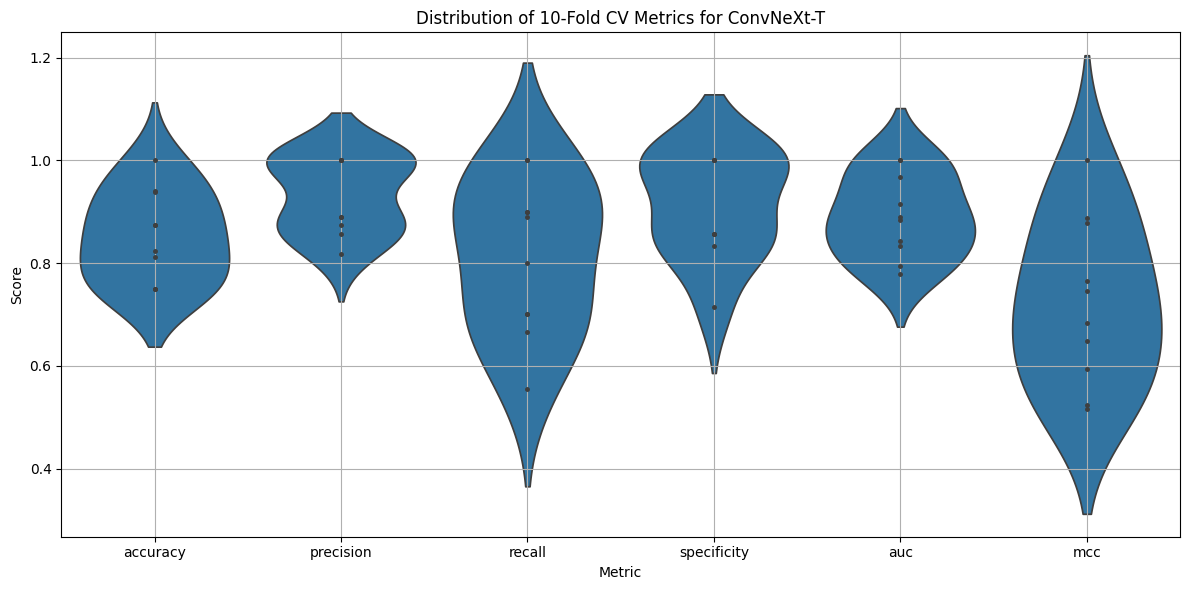

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to DataFrame
cv_results_df = pd.DataFrame(fold_metrics)
cv_results_df.to_csv("convnext_10x10fold_metrics.csv", index=False)

# Violin Plot
cv_long = pd.melt(cv_results_df, id_vars=["fold"], value_vars=["accuracy", "precision", "recall", "specificity", "auc", "mcc"])
plt.figure(figsize=(12, 6))
sns.violinplot(x="variable", y="value", data=cv_long, inner="point", scale="width")
plt.title("Distribution of 10-Fold CV Metrics for ConvNeXt-T")
plt.xlabel("Metric")
plt.ylabel("Score")
plt.grid(True)
plt.tight_layout()
plt.savefig("convnext_violin_plot.png")
plt.show()


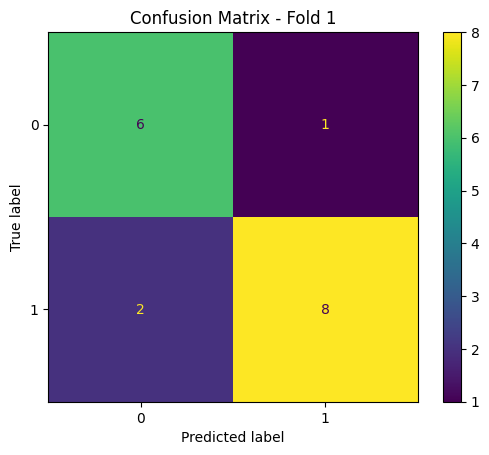

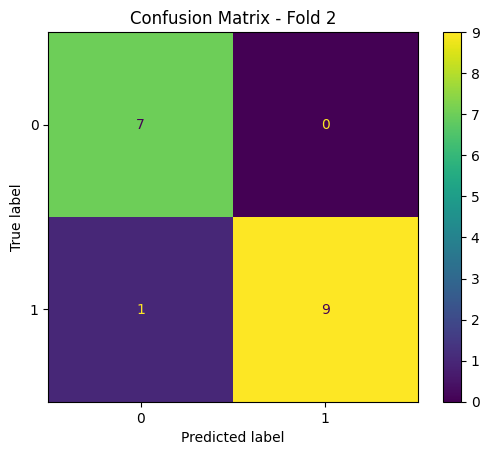

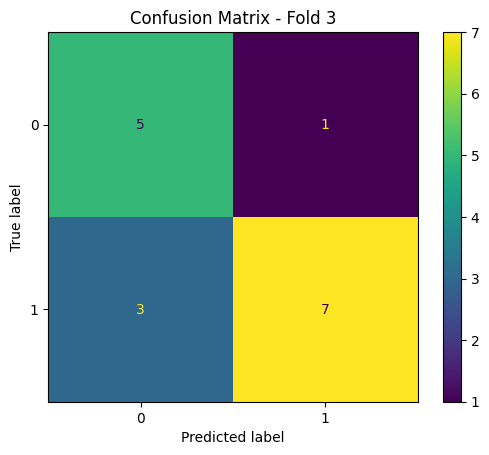

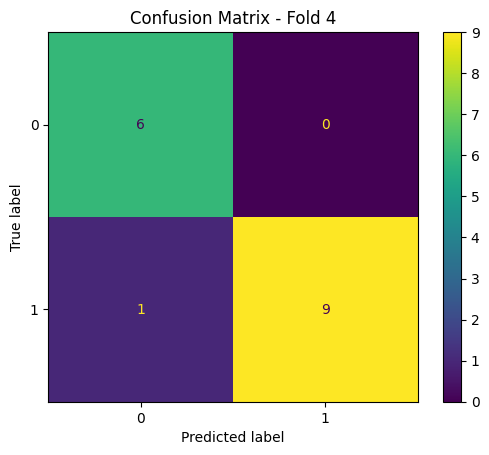

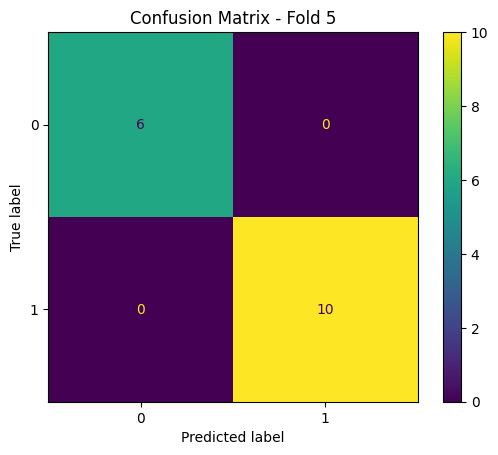

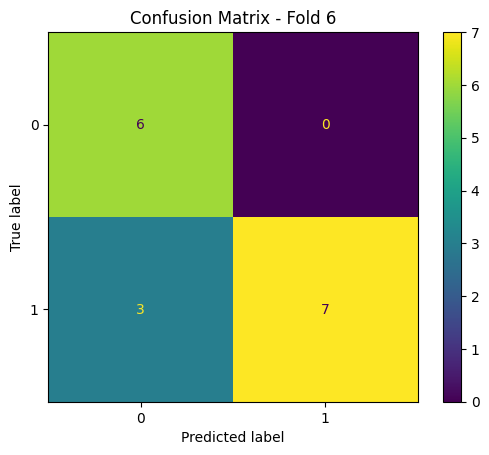

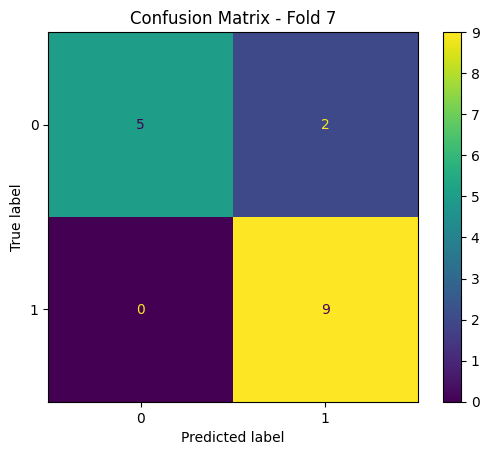

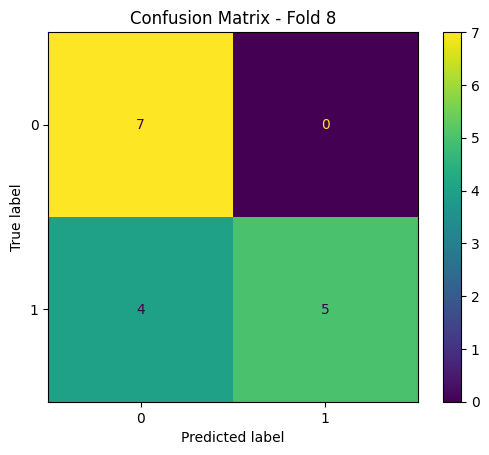

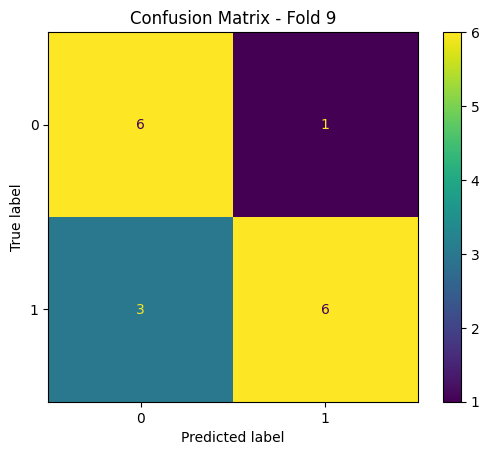

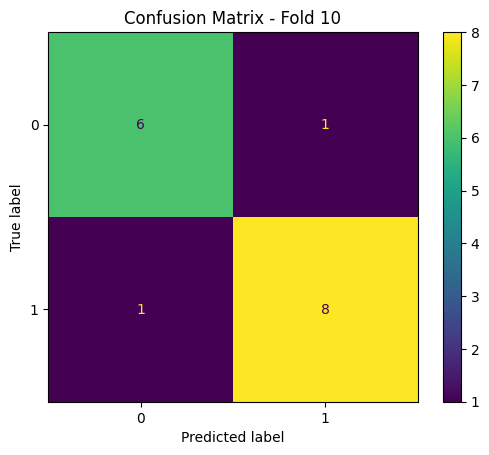

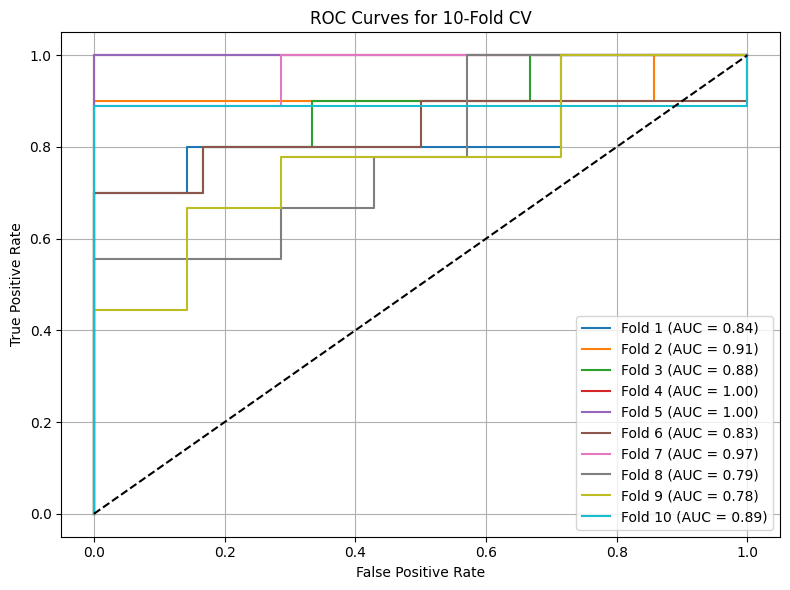

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Confusion Matrices per fold
for fold in range(1, 11):
    y_true = fold_results[fold]["y_true"]
    y_pred_probs = fold_results[fold]["y_pred_probs"]
    y_pred = (y_pred_probs > 0.5).astype(int)

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.title(f"Confusion Matrix - Fold {fold}")
    plt.savefig(f"conf_matrix_fold_{fold}.png")
    plt.show()

# Combined ROC-AUC plot
plt.figure(figsize=(8, 6))
for fold in range(1, 11):
    y_true = fold_results[fold]["y_true"]
    y_pred_probs = fold_results[fold]["y_pred_probs"]
    fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Fold {fold} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves for 10-Fold CV")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("roc_auc_10fold.png")
plt.show()


In [ ]:
fold_results[fold + 1] = {
    'y_true': y_true,
    'y_pred_probs': y_pred_probs
}


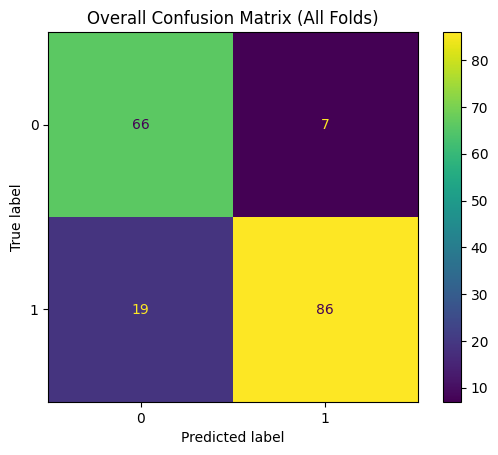

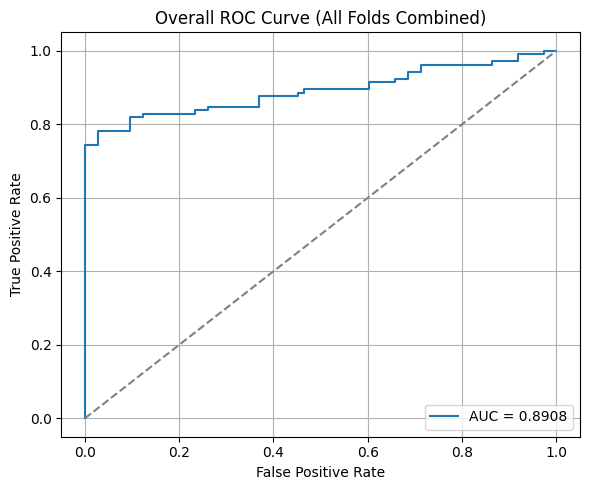

 Overall AUC Score: 0.8908


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Combine predictions from all folds
all_y_true = np.concatenate([fold_results[fold]["y_true"] for fold in fold_results])
all_y_pred_probs = np.concatenate([fold_results[fold]["y_pred_probs"] for fold in fold_results])
all_y_pred = (all_y_pred_probs > 0.5).astype(int)

# === Confusion Matrix ===
cm = confusion_matrix(all_y_true, all_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Overall Confusion Matrix (All Folds)")
plt.savefig("overall_confusion_matrix.png")
plt.show()

# === ROC AUC Curve ===
fpr, tpr, _ = roc_curve(all_y_true, all_y_pred_probs)
roc_auc = roc_auc_score(all_y_true, all_y_pred_probs)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("Overall ROC Curve (All Folds Combined)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.savefig("overall_roc_auc.png")
plt.show()

print(f" Overall AUC Score: {roc_auc:.4f}")


In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    matthews_corrcoef, confusion_matrix, roc_auc_score
)
import numpy as np

# Your combined predictions (already available)
all_y_true = np.concatenate([fold_results[fold]["y_true"] for fold in fold_results])
all_y_pred_probs = np.concatenate([fold_results[fold]["y_pred_probs"] for fold in fold_results])
all_y_pred = (all_y_pred_probs > 0.5).astype(int)

# Confusion matrix components
tn, fp, fn, tp = confusion_matrix(all_y_true, all_y_pred).ravel()

# Metrics
accuracy = accuracy_score(all_y_true, all_y_pred)
precision = precision_score(all_y_true, all_y_pred)
recall = recall_score(all_y_true, all_y_pred)
specificity = tn / (tn + fp)
f1 = f1_score(all_y_true, all_y_pred)
mcc = matthews_corrcoef(all_y_true, all_y_pred)
auc_score = roc_auc_score(all_y_true, all_y_pred_probs)

# Print all
print("=== Overall Evaluation Metrics ===")
print(f"Accuracy     : {accuracy:.4f}")
print(f"Precision    : {precision:.4f}")
print(f"Recall       : {recall:.4f}")
print(f"Specificity  : {specificity:.4f}")
print(f"F1 Score     : {f1:.4f}")
print(f"MCC          : {mcc:.4f}")
print(f"ROC AUC      : {auc_score:.4f}")


=== Overall Evaluation Metrics ===
Accuracy     : 0.8539
Precision    : 0.9247
Recall       : 0.8190
Specificity  : 0.9041
F1 Score     : 0.8687
MCC          : 0.7121
ROC AUC      : 0.8908


In [ ]:
import torch

print("CUDA available:", torch.cuda.is_available())
print("GPU name:", torch.cuda.get_device_name(0))


CUDA available: True
GPU name: NVIDIA GeForce RTX 4060 Laptop GPU


## Ensemble

In [ ]:
from keras.applications.convnext import ConvNeXtTiny
from keras.src.applications.convnext import LayerScale

custom_objects = {"ConvNeXtTiny": ConvNeXtTiny, "LayerScale": LayerScale}

model = tf.keras.models.load_model(
    f"convnext_t_fold{fold + 1}.h5",
    custom_objects=custom_objects
)


OSError: No file or directory found at convnext_t_fold11.h5

Found 162 validated image filenames belonging to 2 classes.


Loading model for fold 1
Loading model for fold 2
Loading model for fold 3
Loading model for fold 4
Loading model for fold 5

=== Ensemble Performance (Original + Augmented) ===
Accuracy: 0.4074074074074074
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC: 0.580334595959596
MCC: 0.0
Specificity: 1.0


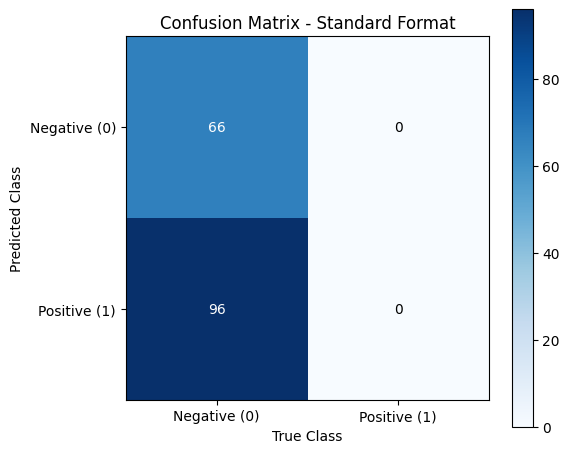

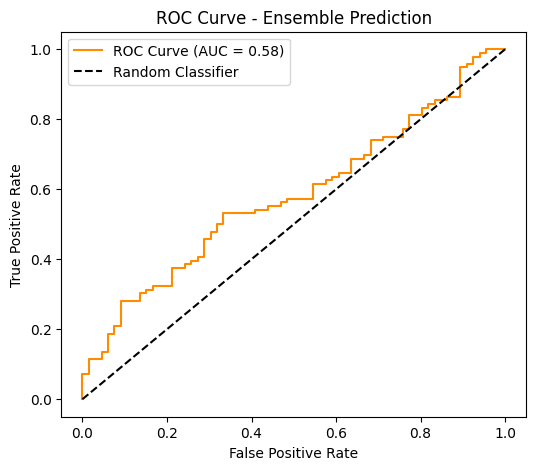

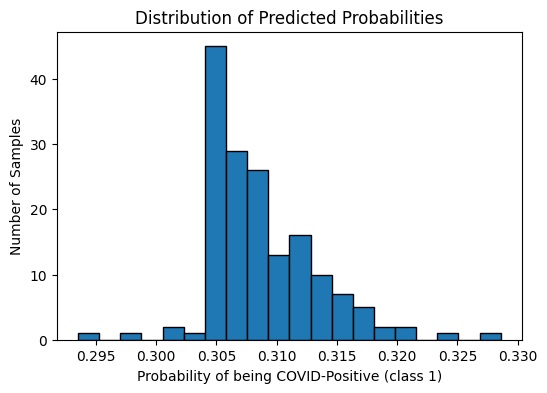

In [ ]:
# Fixed Block 5: Load ConvNeXt-T Fold Models with Custom Objects

import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, matthews_corrcoef, confusion_matrix, roc_curve
)
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.convnext import ConvNeXtTiny
from keras.src.applications.convnext import LayerScale

# === Step 1: Load merged labels ===
df = pd.read_csv("merged_labels.csv")
df['label'] = df['label'].astype(str)  # Needed for ImageDataGenerator flow_from_dataframe

# === Step 2: Image paths and settings ===
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
IMAGE_DIR = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\dataset\content\dataset"
AUGMENTED_DIR = r"C:\Users\ajith\OneDrive\Desktop\Dissertation\dataset\content\dataset\augmented"
FULL_IMAGE_DIR = [IMAGE_DIR, AUGMENTED_DIR]

# === Step 3: Combine all image paths ===
df_combined = df.copy()
df_combined['filename'] = df_combined['filename'].apply(lambda x: x if "\\" not in x else x.split("\\")[-1])
df_combined['filepath'] = df_combined['filename'].apply(
    lambda x: f"{AUGMENTED_DIR}/{x}" if tf.io.gfile.exists(f"{AUGMENTED_DIR}/{x}") else f"{IMAGE_DIR}/{x}"
)

# === Step 4: Create prediction generator ===
datagen = ImageDataGenerator(rescale=1./255)
test_gen = datagen.flow_from_dataframe(
    dataframe=df_combined,
    x_col="filepath",
    y_col="label",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)

# === Step 5: Load each fold model and predict ===
N_SPLITS = 5
ensemble_preds = np.zeros(test_gen.n)
custom_objects = {"ConvNeXtTiny": ConvNeXtTiny, "LayerScale": LayerScale}

for fold in range(N_SPLITS):
    print(f"Loading model for fold {fold + 1}")
    model = tf.keras.models.load_model(
        f"convnext_t_fold{fold + 1}.h5",
        custom_objects=custom_objects,
        compile=False
    )
    preds = model.predict(test_gen, verbose=0).ravel()
    ensemble_preds += preds

ensemble_preds /= N_SPLITS
y_true = test_gen.classes
y_pred = (ensemble_preds > 0.5).astype(int)

# === Step 6: Metrics ===
print("\n=== Ensemble Performance (Original + Augmented) ===")
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred, zero_division=0))
print("Recall:", recall_score(y_true, y_pred, zero_division=0))
print("F1 Score:", f1_score(y_true, y_pred, zero_division=0))
print("AUC:", roc_auc_score(y_true, ensemble_preds))
print("MCC:", matthews_corrcoef(y_true, y_pred))
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
print("Specificity:", specificity)

# === Step 7: Confusion Matrix ===
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("Confusion Matrix - Standard Format")
plt.colorbar()
classes = ["Negative (0)", "Positive (1)"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], fmt),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Predicted Class')
plt.xlabel('True Class')
plt.tight_layout()
plt.show()

# === Step 8: ROC Curve ===
fpr, tpr, _ = roc_curve(y_true, ensemble_preds)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_true, ensemble_preds):.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Ensemble Prediction')
plt.legend()
plt.show()

# === Step 9: Predicted Probability Distribution ===
plt.figure(figsize=(6, 4))
plt.hist(ensemble_preds, bins=20, edgecolor='k')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Probability of being COVID-Positive (class 1)')
plt.ylabel('Number of Samples')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu

# --- Assuming these were accumulated during 10-fold CV ---
# y_val_all_probs: list or array of predicted probabilities across all folds
# y_val_all_true:  list or array of true labels across all folds

# Make sure they are NumPy arrays
y_val_all_probs = np.array(y_val_all_probs)
y_val_all_true = np.array(y_val_all_true)

# Create DataFrame
df_cv = pd.DataFrame({
    "True Label": y_val_all_true,
    "Predicted Probability": y_val_all_probs
})
df_cv["Class"] = df_cv["True Label"].map({0: "Negative", 1: "Positive"})

# === Violin Plot ===
plt.figure(figsize=(8, 6))
sns.violinplot(x="Class", y="Predicted Probability", data=df_cv, inner="box", palette="Set1")
plt.title("Violin Plot of Predicted Probabilities (10-Fold CV Model)")
plt.xlabel("True Class")
plt.ylabel("Predicted Probability")
plt.grid(True)
plt.show()

# === Statistical Test ===

# T-test
t_stat, p_value_ttest = ttest_ind(
    df_cv[df_cv["True Label"] == 0]["Predicted Probability"],
    df_cv[df_cv["True Label"] == 1]["Predicted Probability"],
    equal_var=False
)

# Mann-Whitney U test (non-parametric)
u_stat, p_value_mwu = mannwhitneyu(
    df_cv[df_cv["True Label"] == 0]["Predicted Probability"],
    df_cv[df_cv["True Label"] == 1]["Predicted Probability"],
    alternative='two-sided'
)

# === Print p-values ===
print(f"\nT-test p-value: {p_value_ttest:.5f}")
print(f"Mann-Whitney U test p-value: {p_value_mwu:.5f}")


NameError: name 'y_val_all_probs' is not defined

In [ ]:

import pandas as pd

df_all_metrics = pd.DataFrame(all_repeat_metrics)
df_all_metrics.to_csv("convnext_10x10_cv_metrics.csv", index=False)
print("Saved all 10x10 CV metrics to convnext_10x10_cv_metrics.csv")

# Optional: show mean/std
summary = df_all_metrics.groupby("fold").mean()
print("\nMean metrics per fold across all repeats:")
print(summary)


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, matthews_corrcoef
)
import pandas as pd
import numpy as np
import os

N_RUNS = 10
N_SPLITS = 10
results = []

for run in range(1, N_RUNS + 1):
    print(f"🔁 Run {run}/{N_RUNS}")
    skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=run)

    for fold, (train_idx, val_idx) in enumerate(skf.split(df['filename'], df['label']), start=1):
        print(f"▶ Run {run} Fold {fold}")

        train_df = df.iloc[train_idx]
        val_df = df.iloc[val_idx]

        train_gen = datagen.flow_from_dataframe(
            dataframe=train_df,
            directory=image_dir,
            x_col='filename',
            y_col='label',
            target_size=IMG_SIZE,
            class_mode='binary',
            batch_size=BATCH_SIZE,
            shuffle=True
        )

        val_gen = datagen.flow_from_dataframe(
            dataframe=val_df,
            directory=image_dir,
            x_col='filename',
            y_col='label',
            target_size=IMG_SIZE,
            class_mode='binary',
            batch_size=BATCH_SIZE,
            shuffle=False
        )

        # Build and train model
        model = build_convnext_t_model()

        history = model.fit(
            train_gen,
            validation_data=val_gen,
            epochs=EPOCHS,
            class_weight=class_weights_dict,
            callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)],
            verbose=1
        )

        # Evaluate
        val_gen.reset()
        y_true = val_df["label"].astype(int).values
        y_pred_probs = model.predict(val_gen, verbose=0).ravel()
        y_pred = (y_pred_probs > 0.5).astype(int)

        results.append({
            "run": run,
            "fold": fold,
            "accuracy": accuracy_score(y_true, y_pred),
            "precision": precision_score(y_true, y_pred, zero_division=0),
            "recall": recall_score(y_true, y_pred, zero_division=0),
            "specificity": recall_score(y_true, y_pred, pos_label=0, zero_division=0),
            "f1": f1_score(y_true, y_pred, zero_division=0),
            "auc": roc_auc_score(y_true, y_pred_probs),
            "mcc": matthews_corrcoef(y_true, y_pred)
        })

        # Save model
        os.makedirs("convnext_models", exist_ok=True)
        model.save(f"convnext_models/convnext_t_run{run}_fold{fold}.h5")

# Save metrics
pd.DataFrame(results).to_csv("10x10CVconvnext_updated.csv", index=False)
print("✅ All results saved.")


In [ ]:
from scipy.stats import ttest_rel

df = pd.read_csv("10x10CVconvnext_updated.csv")
metrics = ["accuracy", "precision", "recall", "specificity", "f1", "auc", "mcc"]

summary_stats = {}
for metric in metrics:
    values = df.groupby("run")[metric].mean()
    summary_stats[metric] = {
        "mean": values.mean(),
        "std": values.std(),
    }

summary_df = pd.DataFrame(summary_stats).T
summary_df.to_csv("summary_metrics.csv")
summary_df
